# FEATURE ANALYSIS: IN-DEPTH ANALYSIS OF RELATIONSHIPS BETWEEN VARIABLES, MODEL DEVELOPMENT AND EVALUATION

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("tracks_df.csv")
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [2]:
df.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,popularity,explicit,available_markets,tempo,loudness,duration_min
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.621986,0.667559,5.306341,0.503415,0.092361,0.218299,0.028869,0.183441,0.508496,0.625639,0.220488,0.908788,3.270244,3.835122,3.881951
std,0.154592,0.194907,3.540476,0.500232,0.087908,0.255398,0.131835,0.143871,0.216972,0.177003,0.414778,0.261216,1.841933,1.733498,1.172069
min,0.159000,0.047200,0.000000,0.000000,0.023200,0.000003,0.000000,0.021500,0.054700,0.010000,0.000000,0.012658,1.000000,1.000000,2.000000
25%,0.515000,0.545000,2.000000,0.000000,0.038700,0.023300,0.000000,0.093900,0.341000,0.520000,0.000000,0.987342,1.000000,2.000000,3.000000
50%,0.634000,0.689000,5.000000,1.000000,0.055600,0.102000,0.000002,0.127000,0.508000,0.660000,0.000000,1.000000,3.000000,4.000000,4.000000
75%,0.740000,0.821000,8.000000,1.000000,0.104000,0.345000,0.000188,0.225000,0.668000,0.760000,0.000000,1.000000,5.000000,5.000000,4.000000
max,0.965000,0.988000,11.000000,1.000000,0.618000,0.978000,0.967000,0.943000,0.963000,1.000000,1.000000,1.000000,6.000000,6.000000,21.000000


Unordered Categorical Values: "key", "time_signature", "mode", "explicit"

Ordered Categorical Values: "tempo", "loudness", "duration_min"

Numerical Values: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "available_markets", "popularity"

Audio-Specific Features: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "mode", "key", "time_signature",
    "tempo", "loudness", "duration_min"

Success Metrics: "popularity", "available_markets"

Unique Features: 'id', 'name', 'release_date', 'artists'

# Q1: IS POPULARITY CORRELATED TO THE COUNT OF AVAILABLE MARKETS?

In [3]:
df[["available_markets", "popularity"]].corr()

,available_markets,popularity
available_markets,1.000000,-0.015627
popularity,-0.015627,1.000000


Result: No correlation between available markets and popularity maybe because all songs are available in such markets no matter they are popular.

# Q2: WHICH VARIABLES ARE STATISTICALLY THE MOST IMPORTANT FOR POPULARITY?

                          0
 0.044995      danceability
 0.030237            energy
-0.111425       speechiness
 0.056933              mode
-0.087741      acousticness
-0.004253  instrumentalness
-0.077913          liveness
-0.071437           valence
 0.085273          explicit
-0.005527             tempo
 0.002990          loudness
-0.024391      duration_min


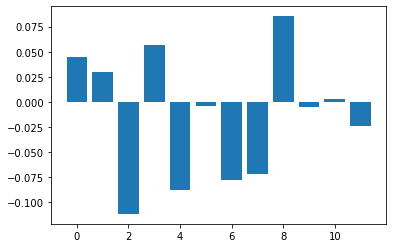

In [4]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "explicit", "tempo", "loudness", "duration_min"]]
y = df["popularity"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: Popularity is not dependent upon any of these features.

# Q3: WHICH VARIABLES ARE PROBABLY CORRELATED?

In [5]:
corr_matrix = pd.DataFrame(df.corr().fillna(0))
corr_pos = corr_matrix[corr_matrix > 0.3].notnull()
corr_neg = corr_matrix[corr_matrix < -0.3].notnull()
columns = indexes = corr_pos.columns
for row in range(len(indexes)):
    for col in range(len(columns)):
        if(row <= col):
            pass
        elif(corr_pos.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")
        elif(corr_neg.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")

acousticness  <->  energy ( -0.6713840450067433 )
valence  <->  danceability ( 0.30749055636008665 )
valence  <->  energy ( 0.3755302520937077 )
explicit  <->  danceability ( 0.30175177754538285 )
explicit  <->  speechiness ( 0.391014999394023 )
loudness  <->  energy ( 0.42961170966240575 )


=> Energy of the song is dependent on loudness and valence of the song, and most importantly, inversely proportional on acousticness. 

=> Whether a song is explicit is correlated to danceability, popularity and speechiness. In Speechiness <-> Explicit relationship, there is nothing to examine, because it is a no-brainer to think that speechiness is the necessary condition to have an explicit song. Popularity and danceability seem to be suitable for further analysis.

=> Valence is correlated to not also energy but also danceability, which makes sense.

# Q4: MAY MODE AND KEY HAVE RELATIONSHIP WITH OTHER AUDIO FEATURES ?  

Key: The note that the song is based on (e.g. C, D#, G)

Mode: Whether the key is followed  by a minor or a major chord progression

Key & Mode: 12 * 2 = 24 possible combinations

Key: [0-11] => [C-B] / Mode: [0, 1] => [Minor, Major]

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [7]:
df_group = df[["energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "mode", "key"]].groupby(["mode", "key"]).mean()
df_group.describe()

,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.670495,0.090199,0.222240,0.027398,0.186284,0.508979
std,0.040278,0.024025,0.064085,0.020352,0.026824,0.042868
min,0.604293,0.049642,0.110251,0.000544,0.127091,0.439533
25%,0.646947,0.068878,0.180576,0.015021,0.169597,0.474717
50%,0.671510,0.085321,0.211779,0.022357,0.186841,0.502843
75%,0.698588,0.108156,0.271513,0.031792,0.199769,0.547798
max,0.748717,0.142193,0.348644,0.074933,0.238645,0.577738


Result: The selection of any special key or mode does not play a key role on any feature.

                          0
-0.006472      danceability
 0.168209            energy
 0.417511       speechiness
-0.158548      acousticness
-0.050747  instrumentalness
-0.023761          liveness
-0.072869           valence


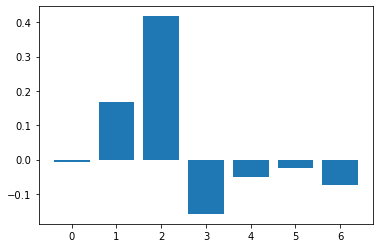

In [8]:
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
y = df["mode"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: The most important features related to the mode of the song are speechiness, acousticness and energy

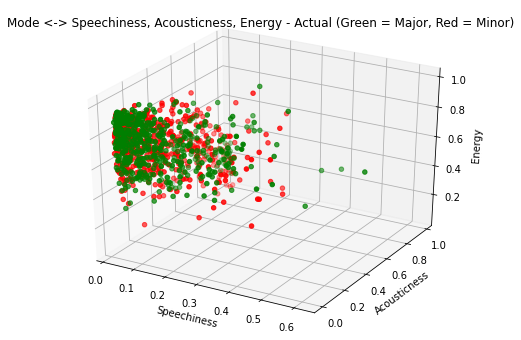

In [9]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["mode"] == 0]["speechiness"], df[df["mode"] == 0]["acousticness"], df[df["mode"] == 0]["energy"], color = "red")
ax.scatter(df[df["mode"] == 1]["speechiness"], df[df["mode"] == 1]["acousticness"], df[df["mode"] == 1]["energy"], color = "green")
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Actual (Green = Major, Red = Minor)")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn import metrics

treemodel = tree.DecisionTreeClassifier()
svmmodel = svm.SVC(kernel = "linear")
logmodel = LogisticRegression()

X = df[["energy", "speechiness", "acousticness"]] 
X_train, X_test, y_train, y_test = train_test_split(X, df["mode"], test_size = 0.2)

treemodel.fit(X_train, y_train)
svmmodel.fit(X_train, y_train)
logmodel.fit(X_train, y_train)

y_pred_svm = svmmodel.predict(X_test)
y_pred_tree = treemodel.predict(X_test)
y_pred_log = logmodel.predict(X_test)

print("treemodel: ", cross_val_score(treemodel, X, df["mode"], cv = 5).mean())
print("svmmodel: ", cross_val_score(svmmodel, X, df["mode"], cv = 5).mean())
print("logmodel: ", cross_val_score(logmodel, X, df["mode"], cv = 5).mean())

logfunction = [x[0] for x in logmodel.predict_proba(X)]

treemodel:  0.5073170731707317
svmmodel:  0.5453658536585366
logmodel:  0.5668292682926829


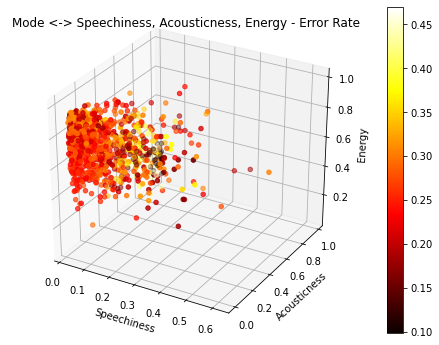

In [11]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["speechiness"], df["acousticness"], df["energy"], cmap = "hot", c = (logfunction - df["mode"])**2)
ax.set_xlabel("Speechiness")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Energy")
ax.set_title("Mode <-> Speechiness, Acousticness, Energy - Error Rate")
fig.colorbar(p)
plt.show()

Result: Despite the fact that the correlation coefficients between mode and other features are moderately significant, the features energy, speechiness and acousticness do not necessarily achieve information gain, as seen above. 

In [12]:
df_key = pd.get_dummies(df["key"], drop_first = True)
df_y = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
for y_val in df_y.columns:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df_key, df[y_val], test_size = 0.2)
    model.fit(X_train, y_train)
    print(y_val, cross_val_score(model, df_key, df[y_val], cv = 5).mean())

danceability -0.013983860577591222
energy -0.10617047668407897
speechiness -0.019176728886248308
acousticness -0.12090604202952711
instrumentalness -0.06473194570456502
liveness -0.041343624683998034
valence -0.0435483874795918


Result: The key of the song does not play any role on these features

# Q5: ENERGY <-> LOUDNESS, VALENCE, ACOUSTICNESS

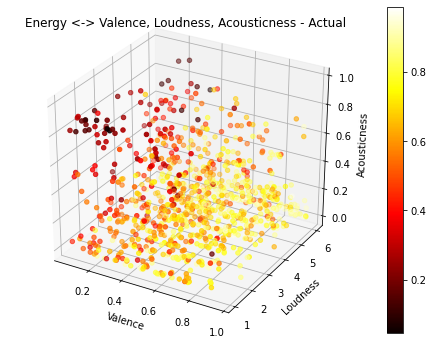

In [13]:
X = df[["valence", "loudness", "acousticness"]]
y = df["energy"]
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = df["energy"])
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Actual")
fig.colorbar(p)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
score.mean()

0.5430659061031898

In [15]:
def energy_function(valence, loudness, acousticness):
    return model.coef_[0]*valence + model.coef_[1]*loudness - model.coef_[2]*acousticness + model.intercept_

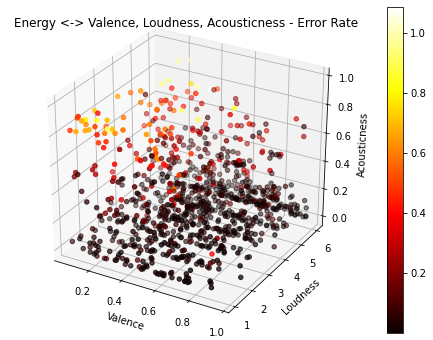

In [16]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = (energy_function(df["valence"], df["loudness"], df["acousticness"]) - df["energy"])**2)
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Error Rate")
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
fig.colorbar(p)
plt.show()

Result: Valence, loudness and acousticness are indeed good predictors of the energy of the song.

# Q6: EXPLICIT <-> POPULARITY, DANCEABILITY, SPEECHINESS

In [17]:
from scipy.stats import pearsonr
X = df[["popularity", "danceability", "speechiness"]]
y = df["explicit"]
c1, p1 = pearsonr(X["popularity"], y) # :0.30 with very low error
c2, p2 = pearsonr(X["danceability"], y) # :0.34 with very low error
c3, p3 = pearsonr(X["speechiness"], y) #0.38 with very low error

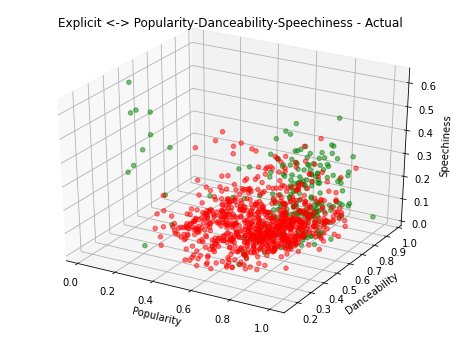

In [18]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df["explicit"] == 0]["popularity"], df[df["explicit"] == 0]["danceability"], df[df["explicit"] == 0]["speechiness"], color = "red", alpha = 0.5)
ax.scatter(df[df["explicit"] == 1]["popularity"], df[df["explicit"] == 1]["danceability"], df[df["explicit"] == 1]["speechiness"], color = "green", alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Actual")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
score = cross_val_score(logmodel, X, y, cv = 5)
print(score.mean())
logfunction = [x[0] for x in logmodel.predict_proba(X)]

0.8126829268292683


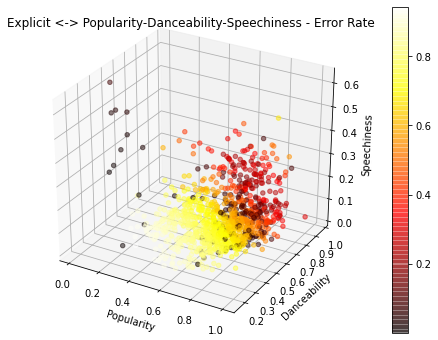

In [20]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["popularity"], df["danceability"], df["speechiness"], cmap = "hot", c = (logfunction - df["explicit"])**2, alpha = 0.5)
ax.set_xlabel("Popularity")
ax.set_ylabel("Danceability")
ax.set_zlabel("Speechiness")
ax.set_title("Explicit <-> Popularity-Danceability-Speechiness - Error Rate")
fig.colorbar(p)
plt.show()

Result: Based on speechiness, popularity and danceability of a song, we can predict with whether the content of a song is explicit or not, but it is very difficult to differentiate in songs with lower danceability.

# Q7: VALENCE <-> ENERGY, DANCEABILITY

In [21]:
X = df[["danceability", "energy"]]
y = df["valence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X, y, cv = 5)
c1, p1 = pearsonr(df["danceability"], df["valence"]) # :0.33 with very low error
c2, p2 = pearsonr(df["energy"], df["valence"]) # :0.38 with very low error
score.mean()

0.20254604988457134

In [22]:
def valence_function(danceability, energy):
    return model.coef_[0]*danceability + model.coef_[1]*energy - model.intercept_

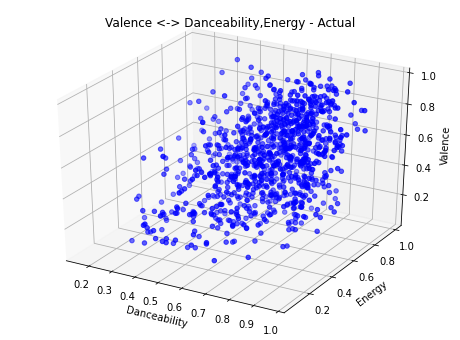

In [23]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], df["valence"], color = "blue")
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability,Energy - Actual")
plt.show()

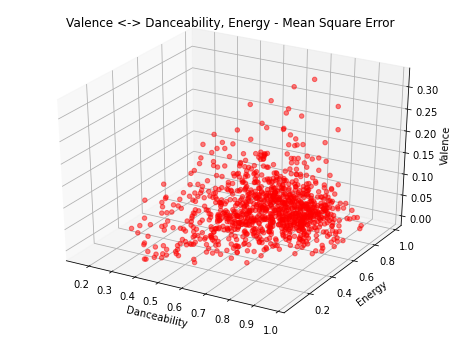

In [24]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["danceability"], df["energy"], (valence_function(df["danceability"], df["energy"]) - df["valence"])**2, color = "red", alpha = 0.5)
ax.set_xlabel("Danceability")
ax.set_ylabel("Energy")
ax.set_zlabel("Valence")
ax.set_title("Valence <-> Danceability, Energy - Mean Square Error")
plt.show()

Result: Despite the fact that valence of any song seem to be moderately correlated to energy and danceability, the overall score of model is too low and the error rate is respectively high as seen in the scatterplot.